# Directors

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [32]:
path_chungus = 'C:/Users/Jack/flatiron/module-01/mod-1-project/data/unzipped_data/chungus_with_tmdb.csv'
df = pd.read_csv(path_chungus, index_col=0)

In [33]:
df = df[df['worldwide_gross'] > 0]
#Create new variable based on the ROI of a movie:
df['roi'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

## Directors

In [34]:
# look at the shape of directors
df['director_1'].value_counts().describe()

count    2741.000000
mean        1.278001
std         0.726496
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: director_1, dtype: float64

### Directors and Gross

In [35]:
# drop gross NaN's
df_valid_gross = df.dropna(subset=['worldwide_gross'])
# check resulting length
len(df_valid_gross)

3590

In [36]:
# get rid of directors without multiple films
df_directors = df_valid_gross[df_valid_gross.duplicated('director_1') 
                             | df_valid_gross.duplicated('director_1', keep='last')]
# verify that all single-film directors are removed
df_directors['director_1'].value_counts()

nm0000229    8
nm0000142    8
nm0337773    7
nm0000631    6
nm0001752    6
            ..
nm1481618    2
nm0030735    2
nm0275629    2
nm0001814    2
nm3255154    2
Name: director_1, Length: 483, dtype: int64

In [37]:
# take a look at how many films a median director does
df_directors['director_1'].value_counts().describe()

count    483.000000
mean       2.577640
std        0.972483
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: director_1, dtype: float64

In [38]:

# group directors and get median worldwide_gross
dft = df_directors[['director_1', 'worldwide_gross']].groupby(['director_1']).median().sort_values('worldwide_gross', ascending=False)

# dft[(dft['worldwide_gross'] < 1) & (dft['worldwide_gross'] > -1)].sort_values('worldwide_gross', ascending=False)['worldwide_gross'].to_list()

# flatten dft
dft = dft.reset_index()

# exclude anomolous 'home' movie
# dft = dft[(dft['worldwide_gross'] < 88)]

# isolate the top 3 directors
dft = dft[0:3]

# add the typical director based on median
observation_typical_director = {'director_1': 'Typical', 
                                'worldwide_gross': df['worldwide_gross'].median()}

#append row to the dataframe
dft = dft.append(observation_typical_director, ignore_index=True)

# map id's to names pulled from web
id_to_name = {'nm0751577': 'Joe Russo', 'nm0005222': 'Sam Mendes', 'nm1853544': 'Pierre Coffin'}
dft = dft.replace({'director_1': id_to_name})


# verify it makes sense
display(dft)

,director_1,worldwide_gross
0,Joe Russo,1.140069e+09
1,Sam Mendes,9.950740e+08
2,Pierre Coffin,9.752168e+08
3,Typical,3.354490e+07


Text(0, 0.5, 'World Gross (billions, USD)')

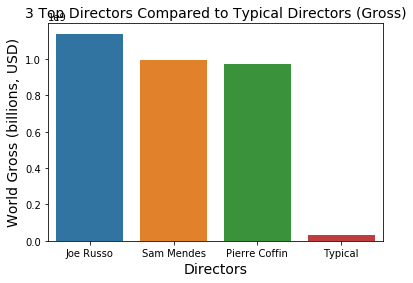

In [39]:
sns.barplot(x='director_1', y='worldwide_gross', data=dft.head())
plt.title('3 Top Directors Compared to Typical Directors (Gross)', fontsize=14)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("World Gross (billions, USD)", fontsize=14)

In [40]:
# Sanity check
# col = 'director_1'
# for person in dft[col]:
#     display(df[df[col] == person])

### Directors and ROI

In [41]:
# drop roi NaN's
df_valid_rois = df.dropna(subset=['roi'])
# check resulting length
len(df_valid_rois)

3590

In [42]:
# get rid of directors without multiple films
df_directors = df_valid_rois[df_valid_rois.duplicated('director_1') 
                             | df_valid_rois.duplicated('director_1', keep='last')]
# verify that all single-film directors are removed
df_directors['director_1'].value_counts()

nm0000229    8
nm0000142    8
nm0337773    7
nm0000631    6
nm0001752    6
            ..
nm1481618    2
nm0030735    2
nm0275629    2
nm0001814    2
nm3255154    2
Name: director_1, Length: 483, dtype: int64

In [43]:
# take a look at how many films a median director does
df_directors['director_1'].value_counts().describe()

count    483.000000
mean       2.577640
std        0.972483
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: director_1, dtype: float64

Looks like 2 movies is a typical number of movies

In [44]:

# group directors and get median roi
dft = df_directors[['director_1', 'roi']].groupby(['director_1']).median().sort_values('roi', ascending=False)

# dft[(dft['roi'] < 1) & (dft['roi'] > -1)].sort_values('roi', ascending=False)['roi'].to_list()

# flatten dft
dft = dft.reset_index()

# exclude anomolous 'home' movie
dft = dft[(dft['roi'] < 88)]

# isolate the top 3 directors
dft = dft[0:3]

# add the typical director based on median
observation_typical_director = {'director_1': 'Typical', 
                                'roi': df['roi'].median()}

#append row to the dataframe
dft = dft.append(observation_typical_director, ignore_index=True)


# map id's to names pulled from web
id_to_name = {'nm0068587': 'William Brent Bell', 'nm0134224': 'Kay Cannon', 'nm1443502': 'Jordan Peele'}
dft = dft.replace({'director_1': id_to_name})

# verify it makes sense
display(dft)

,director_1,roi
0,William Brent Bell,53.290793
1,Kay Cannon,46.685970
2,Jordan Peele,30.892053
3,Typical,0.756917


Text(0, 0.5, 'ROI')

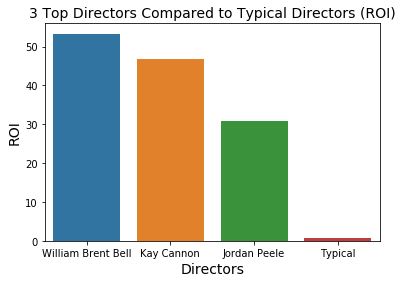

In [45]:
sns.barplot(x='director_1', y='roi', data=dft.head())
plt.title('3 Top Directors Compared to Typical Directors (ROI)', fontsize=14)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("ROI", fontsize=14)

Look at the shape of roi for those with valid directors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0BF49940>]],
      dtype=object)

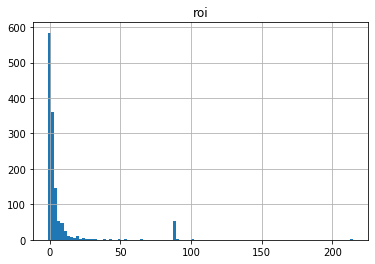

In [49]:
df_directors.hist(column='roi', bins=100)

Zoom in

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0C59BD68>]],
      dtype=object)

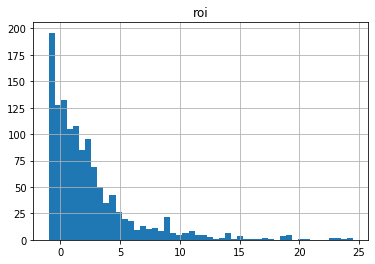

In [55]:
df_directors[df_directors['roi'] < 25].hist(column='roi', bins=50)

Zoom in more

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0AE51860>]],
      dtype=object)

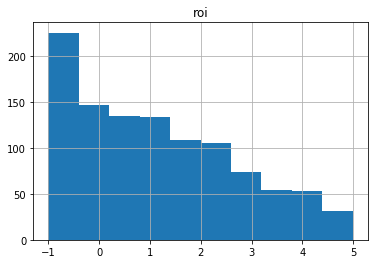

In [56]:
df_directors[df_directors['roi'] < 5].hist(column='roi', bins=10)

In [69]:
df_directors['production_budget'].value_counts().reset_index()

,index,production_budget
0,500000.0,58
1,15000000.0,52
2,5000000.0,51
3,20000000.0,50
4,10000000.0,46
...,...,...
209,117000000.0,1
210,106000000.0,1
211,7500000.0,1
212,14400000.0,1


This seems a little strange. Why would production_budget only have a few repeating values?

Because production budget is so wonky, I'm going to focus on worldwide_gross

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0C5C9A58>]],
      dtype=object)

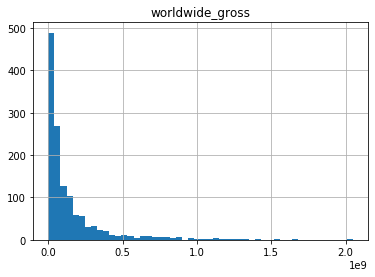

In [71]:
df_directors.hist(column='worldwide_gross', bins=50)

zoom in

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B12CE8F60>]],
      dtype=object)

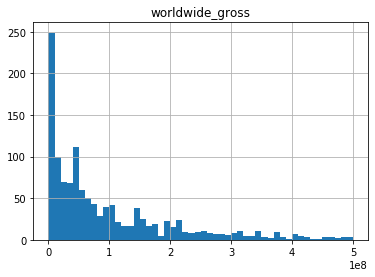

In [73]:
df_directors[df_directors['worldwide_gross'] < 500_000_000].hist(column='worldwide_gross', bins=50)

zoom in

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0B8E4550>]],
      dtype=object)

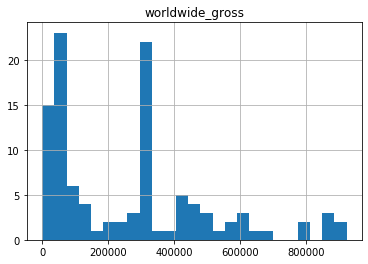

In [75]:
df_directors[df_directors['worldwide_gross'] < 1_000_000].hist(column='worldwide_gross', bins=25)

In [76]:
df_directors[df_directors['worldwide_gross'] < 200_000]

,tconst,primary_title_chungus,original_title_chungus,start_year,runtime_minutes,averagerating,numvotes,Crime,War,Adventure,...,genre_ids,id,original_language,original_title_tmdb,popularity,release_date_tmdb,title,vote_average,vote_count,roi
5645,tt1125929,Love Ranch,Love Ranch,2010,117.0,5.6,2742.0,0.0,0.0,0.0,...,[18],39845.0,en,Love Ranch,6.185,2010-06-30,Love Ranch,6.1,28.0,-0.994154
5677,tt1134795,Akira,Akira,2021,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.997552
5685,tt1137470,Accidental Love,Accidental Love,2015,100.0,4.1,7048.0,0.0,0.0,0.0,...,"[10749, 35]",316002.0,en,Accidental Love,6.487,2015-02-10,Accidental Love,4.0,172.0,-0.994791
6323,tt1274586,Dying of the Light,Dying of the Light,2014,94.0,4.4,8888.0,0.0,0.0,0.0,...,"[53, 18]",297596.0,en,Dying of the Light,9.064,2014-12-04,Dying of the Light,4.6,174.0,-0.985072
6655,tt1321869,The Lovers,The Lovers,2013,109.0,4.6,2867.0,0.0,0.0,1.0,...,[35],426253.0,en,The Lovers,4.901,2017-05-05,The Lovers,5.3,38.0,-0.998460
8026,tt1470020,Redemption Road,Redemption Road,2010,95.0,5.8,479.0,0.0,0.0,0.0,...,[18],74457.0,en,Redemption Road,1.128,2011-08-26,Redemption Road,4.7,6.0,-0.987224
8210,tt1486193,5 Days of War,5 Days of War,2011,113.0,5.6,13089.0,0.0,1.0,0.0,...,"[10752, 18]",50601.0,en,5 Days of War,8.689,2011-08-18,5 Days of War,5.7,102.0,-0.992684
8968,tt1534085,Beyond the Black Rainbow,Beyond the Black Rainbow,2010,110.0,6.0,10765.0,0.0,0.0,0.0,...,"[14, 878, 27]",50037.0,en,Beyond the Black Rainbow,7.331,2011-09-24,Beyond the Black Rainbow,5.9,150.0,-0.948645
10848,tt1610996,Absentia,Absentia,2011,87.0,5.8,15507.0,0.0,0.0,0.0,...,"[9648, 27, 53]",74777.0,en,Absentia,10.357,2011-03-03,Absentia,5.9,175.0,-0.877786
23253,tt1946381,Red Sky,Red Sky,2014,100.0,4.1,1337.0,0.0,0.0,0.0,...,"[28, 53]",242166.0,en,Red Sky,3.879,2014-03-12,Red Sky,4.5,33.0,-0.996355


I'm seeing a lot of duplicates in chungus; let's see if I get rid of them somehow.

In [94]:
df_directors['stripped_title'] = df_directors['primary_title_chungus'].str.lower().str.replace('\W', '')
df_directors

,tconst,primary_title_chungus,original_title_chungus,start_year,runtime_minutes,averagerating,numvotes,Crime,War,Adventure,...,id,original_language,original_title_tmdb,popularity,release_date_tmdb,title,vote_average,vote_count,roi,stripped_title
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,7.3,275300.0,0.0,0.0,1.0,...,116745.0,en,The Secret Life of Walter Mitty,10.743,2013-12-25,The Secret Life of Walter Mitty,7.1,4859.0,1.064409,thesecretlifeofwaltermitty
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,7.0,539338.0,0.0,0.0,1.0,...,135397.0,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056.0,6.669092,jurassicworld
64,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011,84.0,6.0,49550.0,0.0,0.0,1.0,...,45772.0,en,Gnomeo & Juliet,16.408,2011-02-11,Gnomeo & Juliet,5.8,1085.0,4.381610,gnomeojuliet
67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,5.1,28570.0,0.0,0.0,0.0,...,76489.0,en,The Three Stooges,9.358,2012-04-13,The Three Stooges,5.1,215.0,0.801742,thethreestooges
73,tt0401729,John Carter,John Carter,2012,132.0,6.6,241792.0,0.0,0.0,1.0,...,49529.0,en,John Carter,18.549,2012-03-09,John Carter,6.1,3338.0,0.028284,johncarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145020,tt9703646,Into the Woods,Into the Woods,2018,NaN,NaN,NaN,0.0,0.0,0.0,...,224141.0,en,Into the Woods,13.726,2014-12-25,Into the Woods,5.7,2880.0,2.792107,intothewoods
145431,tt9776362,Never Let Me Go,Never Let Me Go,2019,NaN,NaN,NaN,0.0,0.0,0.0,...,42188.0,en,Never Let Me Go,10.012,2010-09-15,Never Let Me Go,6.8,1294.0,-0.255085,neverletmego
145959,tt9851050,Sisters,Sisters,2019,NaN,4.7,14.0,0.0,0.0,0.0,...,266294.0,en,Sisters,10.993,2015-12-18,Sisters,5.9,922.0,2.534355,sisters
146138,tt9877596,Trapped,Trapped,2016,NaN,NaN,NaN,0.0,0.0,0.0,...,159783.0,en,Trapped,0.655,2012-04-01,Trapped,5.8,2.0,-0.769438,trapped


In [96]:
df_directors_clean = df_directors.drop_duplicates(subset='stripped_title')
df_directors_clean

,tconst,primary_title_chungus,original_title_chungus,start_year,runtime_minutes,averagerating,numvotes,Crime,War,Adventure,...,id,original_language,original_title_tmdb,popularity,release_date_tmdb,title,vote_average,vote_count,roi,stripped_title
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,7.3,275300.0,0.0,0.0,1.0,...,116745.0,en,The Secret Life of Walter Mitty,10.743,2013-12-25,The Secret Life of Walter Mitty,7.1,4859.0,1.064409,thesecretlifeofwaltermitty
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,7.0,539338.0,0.0,0.0,1.0,...,135397.0,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056.0,6.669092,jurassicworld
64,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011,84.0,6.0,49550.0,0.0,0.0,1.0,...,45772.0,en,Gnomeo & Juliet,16.408,2011-02-11,Gnomeo & Juliet,5.8,1085.0,4.381610,gnomeojuliet
67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,5.1,28570.0,0.0,0.0,0.0,...,76489.0,en,The Three Stooges,9.358,2012-04-13,The Three Stooges,5.1,215.0,0.801742,thethreestooges
73,tt0401729,John Carter,John Carter,2012,132.0,6.6,241792.0,0.0,0.0,1.0,...,49529.0,en,John Carter,18.549,2012-03-09,John Carter,6.1,3338.0,0.028284,johncarter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141792,tt9247166,The Breakup,The Breakup,2019,NaN,6.8,5.0,0.0,0.0,0.0,...,9767.0,en,The Break-Up,11.165,2006-06-02,The Break-Up,5.7,1480.0,2.956294,thebreakup
142493,tt9347476,Believe,Believe,2016,NaN,NaN,NaN,0.0,0.0,0.0,...,423628.0,en,Believe,1.536,2016-12-02,Believe,6.5,11.0,-0.745628,believe
142786,tt9379184,Never Again,Never Again,2014,46.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.382414,neveragain
145431,tt9776362,Never Let Me Go,Never Let Me Go,2019,NaN,NaN,NaN,0.0,0.0,0.0,...,42188.0,en,Never Let Me Go,10.012,2010-09-15,Never Let Me Go,6.8,1294.0,-0.255085,neverletmego


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B71672E80>]],
      dtype=object)

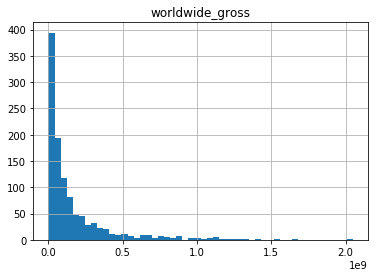

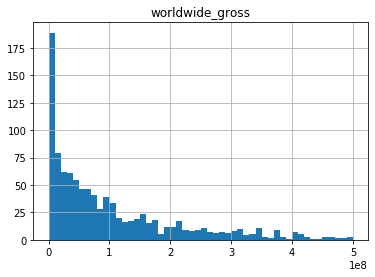

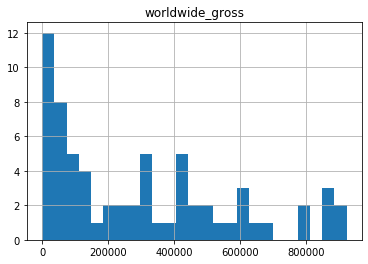

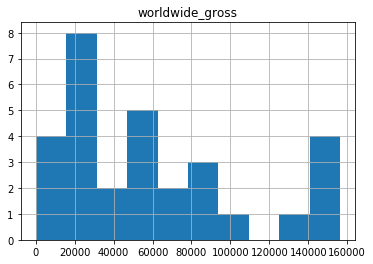

In [101]:
df_directors_clean.hist(column='worldwide_gross', bins=50)
df_directors_clean[df_directors_clean['worldwide_gross'] < 500_000_000].hist(column='worldwide_gross', bins=50)
df_directors_clean[df_directors_clean['worldwide_gross'] < 1_000_000].hist(column='worldwide_gross', bins=25)
df_directors_clean[df_directors_clean['worldwide_gross'] < 200_000].hist(column='worldwide_gross', bins=10)

In [104]:
df.groupby('director_1')['worldwide_gross'].median().median()

26387039.0

It looks like after a bit of cleaning, the relationship between breakaway star directors and a typical director still holds; in fact, the difference is even greater.